In [1]:
import numpy as np
import pandas as pd

In [205]:
my_cols = ["A1", "A2", "A3", "A4", "A5","A6","A7","A8"]
data = pd.read_csv('SeismicResponse.txt',names=my_cols,delimiter='\t')

In [24]:
data

,A1,A2,A3,A4,A5,A6,A7,A8
0,-0.264298,-0.227624,0.364279,-0.096052,0.354945,0.181117,0.667918,0.604012
1,0.560000,0.093200,0.642000,0.069200,0.217000,-0.662000,-0.086200,-0.093000
2,-0.910000,-0.579000,-0.152000,-0.810000,0.365000,0.971000,-0.696000,0.316000
3,0.853000,-1.240000,-0.712000,0.791000,0.298000,0.764000,0.327000,-0.640000
4,0.750000,0.307000,0.677000,0.285000,-0.577000,0.775000,-1.100000,-1.020000
...,...,...,...,...,...,...,...,...
4995,0.211958,0.012930,0.639547,-0.540394,-0.725735,1.040096,-1.004970,-1.922219
4996,-0.526822,1.178716,-0.462624,-0.179855,0.588374,-0.089650,0.080514,0.600101
4997,0.348785,0.101456,-0.166348,0.090875,0.056185,-0.819480,-0.233470,0.889350
4998,-0.228205,-0.310206,0.065542,0.093991,0.755324,0.281063,-0.709294,-0.314332


In [25]:
import seaborn as sns

NameError: name 'set_xlabel' is not defined

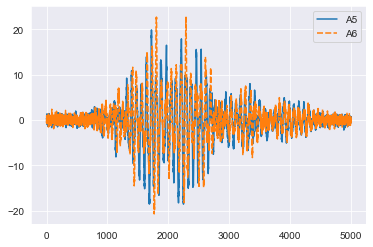

In [67]:
sns.lineplot(data = data[['A5','A6']])
sns.set_style("darkgrid")
set_xlabel("time(0.01s)")
set_ylabel("signal")
set_title("angleB from t = 18s to t = 20s")

In [39]:
# angleB = (a5-a6)/30
# abx = a7-AngleB*7.5
# time = 18 to 20s = 1800 to 2000 column data
data["angleB"] = (data['A5']-data['A6'])/30
data["abx"] = data['A7']-data['angleB']*7.5
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,angleB,abx
0,-0.264298,-0.227624,0.364279,-0.096052,0.354945,0.181117,0.667918,0.604012,0.005794,0.624461
1,0.560000,0.093200,0.642000,0.069200,0.217000,-0.662000,-0.086200,-0.093000,0.029300,-0.305950
2,-0.910000,-0.579000,-0.152000,-0.810000,0.365000,0.971000,-0.696000,0.316000,-0.020200,-0.544500
3,0.853000,-1.240000,-0.712000,0.791000,0.298000,0.764000,0.327000,-0.640000,-0.015533,0.443500
4,0.750000,0.307000,0.677000,0.285000,-0.577000,0.775000,-1.100000,-1.020000,-0.045067,-0.762000


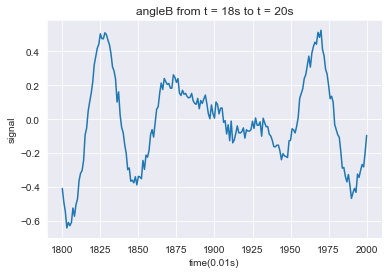

In [133]:
data_18_to_20s = data.loc[1800:2000]
angleB_plot = sns.lineplot(data = data_18_to_20s['angleB'])
sns.set_style("darkgrid")
angleB_plot.set_xlabel("time(0.01s)")
angleB_plot.set_ylabel("signal")
angleB_plot.set_title("angleB from t = 18s to t = 20s")
angleB_plot.figure.savefig("angleB from t = 18s to t = 20s.png")

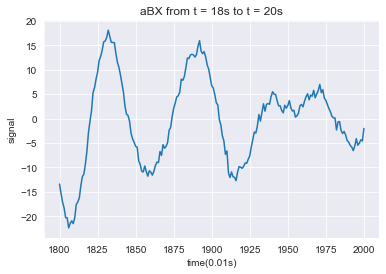

In [134]:
abx_plot = sns.lineplot(data = data_18_to_20s['abx'])
sns.set_style("darkgrid")
abx_plot.set_xlabel("time(0.01s)")
abx_plot.set_ylabel("signal")
abx_plot.set_title("aBX from t = 18s to t = 20s")
abx_plot.figure.savefig("abx from t = 18s to t = 20s.png")

In [113]:
# maximum absolute value of aBX
print('The maximum absolute value of aBX is', data['abx'].abs().max())
second = data['abx'].abs() == data['abx'].abs().max()
second = second.index[second==True].tolist()
second = second[0]*0.01
print('It occurs at',second,'seconds')

The maximum absolute value of aBX is 22.361121636249997
It occurs at 18.06 seconds


In [116]:
#Inter-story drift is the relative displacement between level A and B.
#Define as AIDY = aBY −aAY = ((A5 + A6) - (A1 + A2))/2
data["AIDY"] = ((data['A5']+data['A6'])-(data['A1']+data['A2']))/2
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,angleB,abx,AIDY
0,-0.264298,-0.227624,0.364279,-0.096052,0.354945,0.181117,0.667918,0.604012,0.005794,0.624461,0.513992
1,0.560000,0.093200,0.642000,0.069200,0.217000,-0.662000,-0.086200,-0.093000,0.029300,-0.305950,-0.549100
2,-0.910000,-0.579000,-0.152000,-0.810000,0.365000,0.971000,-0.696000,0.316000,-0.020200,-0.544500,1.412500
3,0.853000,-1.240000,-0.712000,0.791000,0.298000,0.764000,0.327000,-0.640000,-0.015533,0.443500,0.724500
4,0.750000,0.307000,0.677000,0.285000,-0.577000,0.775000,-1.100000,-1.020000,-0.045067,-0.762000,-0.429500


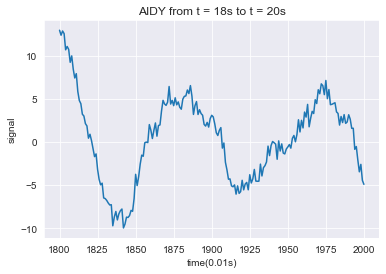

In [135]:
data_18_to_20s = data.loc[1800:2000]
AIDY_plot = sns.lineplot(data = data_18_to_20s['AIDY'])
sns.set_style("darkgrid")
AIDY_plot.set_xlabel("time(0.01s)")
AIDY_plot.set_ylabel("signal")
AIDY_plot.set_title("AIDY from t = 18s to t = 20s")
AIDY_plot.figure.savefig("AIDY from t = 18s to t = 20s.png")

In [119]:
print('The maximum absolute value of AIDY is', data['AIDY'].abs().max())

The maximum absolute value of AIDY is 13.8072427565


(d)

In [169]:
#-----------------------skip d------------------------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      5000 non-null   float64
 1   A2      5000 non-null   float64
 2   A3      5000 non-null   float64
 3   A4      5000 non-null   float64
 4   A5      5000 non-null   float64
 5   A6      5000 non-null   float64
 6   A7      5000 non-null   float64
 7   A8      5000 non-null   float64
 8   angleB  5000 non-null   float64
 9   abx     5000 non-null   float64
 10  AIDY    5000 non-null   float64
 11  VIDY,k  5000 non-null   float64
dtypes: float64(12)
memory usage: 468.9 KB


In [188]:
# inter-story velocity = sum(AIDY)*time
# inter-story drift = sum(inter-story velocity)*time
data['int_sto_v']= data['AIDY']*0.01
data.head()
for i in range(1,5000):
    data['int_sto_v'][i] = data['int_sto_v'][i]+data['int_sto_v'][i-1]

,A1,A2,A3,A4,A5,A6,A7,A8,angleB,abx,AIDY,int_sto_v
0,-0.264298,-0.227624,0.364279,-0.096052,0.354945,0.181117,0.667918,0.604012,0.005794,0.624461,0.513992,0.005140
1,0.560000,0.093200,0.642000,0.069200,0.217000,-0.662000,-0.086200,-0.093000,0.029300,-0.305950,-0.549100,-0.000351
2,-0.910000,-0.579000,-0.152000,-0.810000,0.365000,0.971000,-0.696000,0.316000,-0.020200,-0.544500,1.412500,0.013774
3,0.853000,-1.240000,-0.712000,0.791000,0.298000,0.764000,0.327000,-0.640000,-0.015533,0.443500,0.724500,0.021019
4,0.750000,0.307000,0.677000,0.285000,-0.577000,0.775000,-1.100000,-1.020000,-0.045067,-0.762000,-0.429500,0.016724
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.211958,0.012930,0.639547,-0.540394,-0.725735,1.040096,-1.004970,-1.922219,-0.058861,-0.563513,0.044736,-0.022076
4996,-0.526822,1.178716,-0.462624,-0.179855,0.588374,-0.089650,0.080514,0.600101,0.022601,-0.088992,-0.076585,-0.022842
4997,0.348785,0.101456,-0.166348,0.090875,0.056185,-0.819480,-0.233470,0.889350,0.029189,-0.452387,-0.606768,-0.028909
4998,-0.228205,-0.310206,0.065542,0.093991,0.755324,0.281063,-0.709294,-0.314332,0.015809,-0.827859,0.787399,-0.021035


Text(0.5, 1.0, 'inter-story velocity')

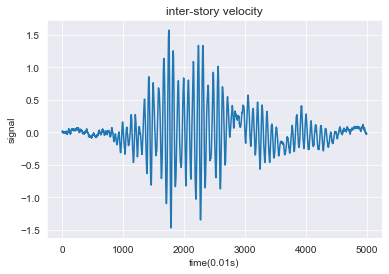

In [192]:
int_sto_v_plot = sns.lineplot(data = data['int_sto_v'])
sns.set_style("darkgrid")
int_sto_v_plot.set_xlabel("time(0.01s)")
int_sto_v_plot.set_ylabel("signal")
int_sto_v_plot.set_title("inter-story velocity")

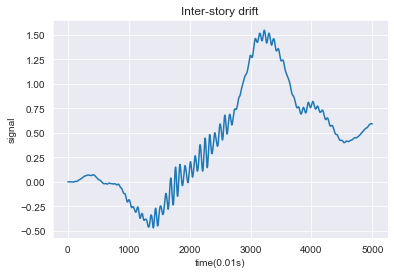

In [199]:
data['int_sto_drift']= data['int_sto_v']*0.01
data.head()
for i in range(1,5000):
    data['int_sto_drift'][i] = data['int_sto_drift'][i]+data['int_sto_drift'][i-1]
    
int_sto_drift_plot = sns.lineplot(data = data['int_sto_drift'])
sns.set_style("darkgrid")
int_sto_drift_plot.set_xlabel("time(0.01s)")
int_sto_drift_plot.set_ylabel("signal")
int_sto_drift_plot.set_title("Inter-story drift")
#int_sto_drift_plot.figure.savefig("Inter-story drift.png")


In [201]:
print('The maximum absolute value of Inter-story drift is', data['int_sto_drift'].abs().max())

The maximum absolute value of Inter-story drift is 1.5468464282531948


(e)

In [127]:
data_from_0_to_5s = data.loc[0:500]
data_A1_from_0_to_5s = data_from_0_to_5s ['A1']
data_A1_from_0_to_5s.head()

0   -0.264298
1    0.560000
2   -0.910000
3    0.853000
4    0.750000
Name: A1, dtype: float64

<AxesSubplot:xlabel='A1', ylabel='Count'>

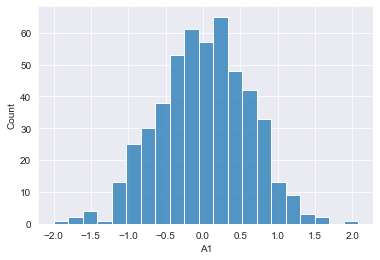

In [128]:
sns.histplot(data = data_A1_from_0_to_5s )

In [130]:
print('The standard deviation of the sensors noise is',data_A1_from_0_to_5s.std())

The standard deviation of the sensors noise is 0.611561143106918


(g)

In [204]:
my_cols = ["A1", "A2", "A3", "A4", "A5","A6","A7","A8"]
data_no_noise = pd.read_csv('SeismicResponse_noNoise.txt',names=my_cols,delimiter='\t')
data_no_noise.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-2.850000e-15,1.290000e-15,-4.590000e-15,1.630000e-15,-2.230000e-16,6.760000e-17,-3.360000e-16,1.000000e-16
2,1.990000e-13,-8.990000e-14,3.190000e-13,-1.130000e-13,1.590000e-14,-4.820000e-15,2.400000e-14,-7.170000e-15
3,7.860000e-13,-3.570000e-13,1.270000e-12,-4.410000e-13,3.090000e-14,-9.940000e-15,4.670000e-14,-1.440000e-14
4,7.310000e-14,8.680000e-14,7.170000e-14,9.220000e-14,-3.160000e-14,5.910000e-15,-4.580000e-14,1.050000e-14


Text(0.5, 1.0, 'Inter-story drift without noise')

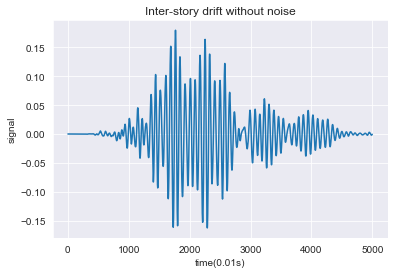

In [210]:
data_no_noise["AIDY"] = ((data_no_noise['A5']+data_no_noise['A6'])-(data_no_noise['A1']+data_no_noise['A2']))/2
data_no_noise.head()
data_no_noise['int_sto_v']= data_no_noise['AIDY']*0.01
data_no_noise.head()
for i in range(1,5000):
    data_no_noise['int_sto_v'][i] = data_no_noise['int_sto_v'][i]+data_no_noise['int_sto_v'][i-1]

    
data_no_noise['int_sto_drift']= data_no_noise['int_sto_v']*0.01
for i in range(1,5000):
    data_no_noise['int_sto_drift'][i] = data_no_noise['int_sto_drift'][i]+data_no_noise['int_sto_drift'][i-1]
    
int_sto_drift_no_noise_plot = sns.lineplot(data = data_no_noise['int_sto_drift'])
sns.set_style("darkgrid")
int_sto_drift_no_noise_plot.set_xlabel("time(0.01s)")
int_sto_drift_no_noise_plot.set_ylabel("signal")
int_sto_drift_no_noise_plot.set_title("Inter-story drift without noise")

In [211]:
int_sto_drift_no_noise_plot.figure.savefig("Inter-story drift without noise.png")
print('The maximum absolute value of Inter-story drift is', data_no_noise['int_sto_drift'].abs().max())

The maximum absolute value of Inter-story drift is 0.17968887954060714


(h)
(c) method is using everytime instance and fin the max of the difference
alternative method is find the max ain min and subtract
No, in most cases, we will not derive at the same result. The more consists method would be to use the method shown in (c).

#-----------------------skip i------------------------------------